# Wine Quality Analysis 

*Comparing different classification models to see which model gives the highest accuracy in predicting the quality of the wine. And also which features contribute the most to the wine for it to be of good quality.*

#### Importing relevant libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [21]:
df = pd.read_csv("1767134-1729261-1613779-Red_wine__(1).csv")

print("Rows, columns: " + str(df.shape))
df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


#### Checking for missing values

In [22]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


#### Replacing the missing values with mean values

In [23]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

In [24]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### Lets draw histogram to see the distribution of *quality* variable

In [25]:
fig = px.histogram(df,x='quality')
fig.show()

#### Correlation matrix

<AxesSubplot:>

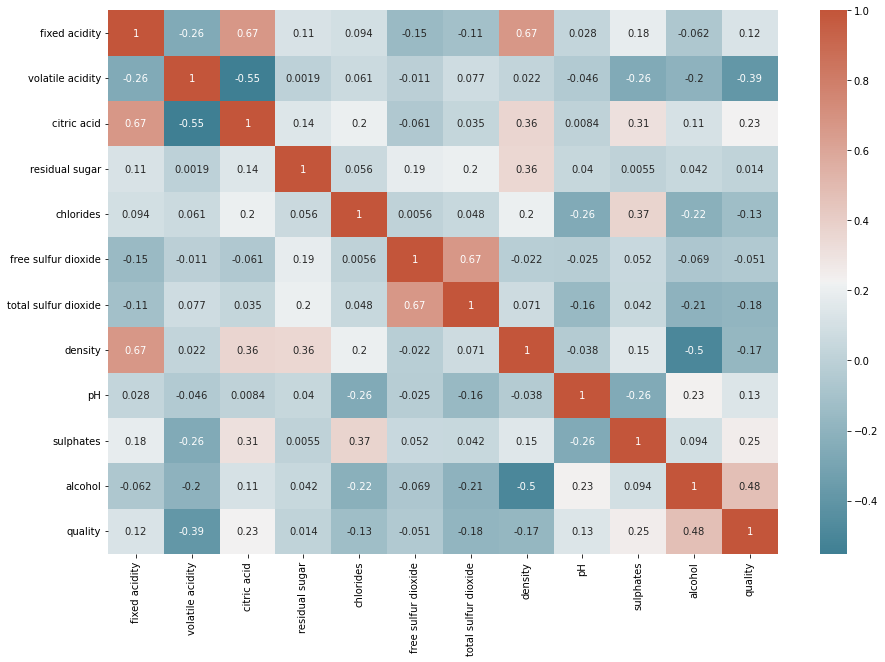

In [26]:
corr = df.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

* We can see some variables that are strongly correlated to *quality*. These variables might be the most important features in our machine learning model

#### Converting to a classification problem

In [27]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

* Defining the wine as 'good quality' if it had a quality score of 7 or higher

In [28]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

* There are reasonable number of good quality wines

#### Standardizing feature variables

In [29]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#### Splitting Data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

### Modelling

* We want to compare five different machine learning models namely Decision trees, Random forests, AdaBoost, Gradient Boost and XGBoost based on their accuracy

#### Model 1: Decision Tree

In [31]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       355
           1       0.55      0.60      0.57        45

    accuracy                           0.90       400
   macro avg       0.75      0.77      0.76       400
weighted avg       0.90      0.90      0.90       400



#### Model 2: Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.75      0.60      0.67        45

    accuracy                           0.93       400
   macro avg       0.85      0.79      0.81       400
weighted avg       0.93      0.93      0.93       400



#### Model 3: AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       355
           1       0.48      0.49      0.48        45

    accuracy                           0.88       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.88      0.88      0.88       400



#### Model 4: Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       355
           1       0.59      0.53      0.56        45

    accuracy                           0.91       400
   macro avg       0.76      0.74      0.75       400
weighted avg       0.90      0.91      0.90       400



#### Model 5: XGBoost

In [35]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

[23:35:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       355
           1       0.60      0.69      0.64        45

    accuracy                           0.91       400
   macro avg       0.78      0.81      0.79       400
weighted avg       0.92      0.91      0.92       400



* After comparing the five models, the **Random Forest** seems to yield the highest accuracy and has a better f1-score for predicting good quality wines (1) compared to other models

#### Feature Importance

<AxesSubplot:>

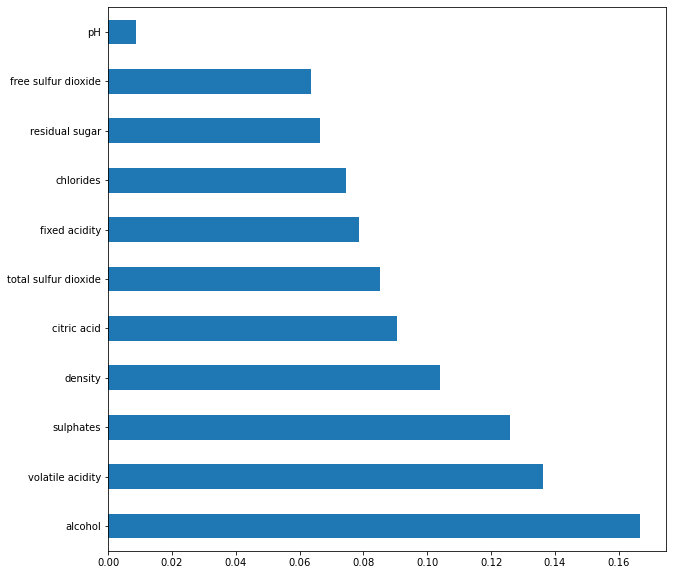

In [36]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

* The top 3 features are **alcohol**, **volatile acidity** and **sulphates**

#### Comparing the top features

In [37]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.515207,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.030400,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,3.230000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.520000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.520000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.520000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.520000,1.360000,14.000000,8.000000,1.0


In [38]:
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.245610,0.996859,3.495976,0.644754,10.251037,5.409288,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.553544,0.001808,0.085267,0.170629,0.969664,0.601649,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.520000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.520000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.520000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,3.900000,2.000000,14.900000,6.000000,0.0


## Conclusion

*Out of the five models, **Random Forest** seems to yield the highest accuracy and we can see that good quality wines have higher levels of **alcohol** on average, lower **volatile acidity** on average and higher levels of **sulphates** on average.*